In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [4]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [5]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [6]:
#TASK 1: Request the Falcon9 Launch Wiki page from its URL

#First, let's perform an HTTP GET method to request the Falcon9 Launch HTML page, as an HTTP response.

# use requests.get() method with the provided static_url

response = requests.get(static_url).text

In [7]:
# assign the response to a object
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
# Use soup.title attribute

soup = BeautifulSoup(response, 'html.parser')


In [8]:
#Printing the page title to verify if the BeautifulSoup object was created properly
# using soup.title attribute
print(soup.title)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [10]:
#TASK 2: Extract all column/variable names from the HTML table header

In [9]:
html_tables = soup.find_all("table")
print(html_tables)

[<table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:100%;">
<tbody><tr>
<td style="text-align: left; vertical-align: top;">
<h3><span class="mw-headline" id="Rocket_configurations">Rocket configurations</span></h3>
<div class="chart noresize" style="margin-top:1em;max-width:420px;">
<div style="position:relative;min-height:320px;min-width:420px;max-width:420px;">
<div style="float:right;position:relative;min-height:240px;min-width:320px;max-width:320px;border-left:1px black solid;border-bottom:1px black solid;">
<div style="position:absolute;left:3px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-color-adjust:exact;border:1px solid LightSteelBlue;border-bottom:none;overflow:hidden;" title="[[Falcon 9 v1.0]]: 2"></div>
<div style="position:absolute;left:55px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-col

In [10]:
# Let's print the third table and check it's content
first_launch_table = html_tables[2]


In [11]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names

temp = soup.find_all('th')
for x in range(len(temp)):
    try:
     name = extract_column_from_header(temp[x])
     if (name is not None and len(name) > 0):
        column_names.append(name) 
    except:
     pass

In [14]:
column_names=='Payload'

False

In [15]:
print(column_names)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'N/A', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'FH 2', 'FH 3', 'Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome', 'Date and time ( )', 'Launch site', 'Payload', '

In [12]:
#TASK 3: Create a data frame by parsing the launch HTML tables

launch_dict= dict.fromkeys(column_names)
# Remove an irrelvant column
del launch_dict['Date and time ( )']
# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
launch_dict['landingPad']=[]
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]


#Next, we just need to fill up the launch_dict with launch records extracted from table rows.

In [13]:
xtracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
      
            launch_dict["Flight No."].append(flight_number)

            datatimelist=date_time(row[0])
            # Date value
        
            date = datatimelist[0].strip(',')
            launch_dict["Date"].append(date)
    
            
            # Time value
        
            time = datatimelist[1]
            launch_dict["Time"].append(time)

              
            # Booster version

            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict["Version Booster"].append(bv)
 
            
            # Launch Site
       
            launch_site = row[2].a.string
            launch_dict["Launch site"].append(launch_site)

            
            # Payload
  
            payload = row[3].a.string
            launch_dict["Payload"].append(payload)

            
            # Payload Mass
         
            payload_mass = get_mass(row[4])
            launch_dict["Payload mass"].append(payload_mass)
  
            
            # Orbit

            orbit = row[5].a.string
            launch_dict["Orbit"].append(orbit)
            
            # Customer
       
            customer = row[6].a.strings
            launch_dict["Customer"].append(customer)

            # Launch outcome
       
            launch_outcome = list(row[7].strings)[0]
            launch_dict["Launch outcome"].append(launch_outcome)

            
            # Booster landing
        
            booster_landing = landing_status(row[8])
            launch_dict["Booster landing"].append(booster_landing)

NameError: name 'extracted_row' is not defined

In [14]:
headings = []
for key,values in dict(launch_dict).items():
    if key not in headings:
        headings.append(key)
    if values is None:
        del launch_dict[key]

def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

pad_dict_list(launch_dict,0)

df = pd.DataFrame.from_dict(launch_dict)
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,landingPad,Version Booster,Booster landing,Date,Time


In [ ]:
#Data Wrangling

In [24]:
pip install js


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
df2['BoosterVersion'].unique()

array(['Falcon 9'], dtype=object)

In [15]:
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv'

df2 = pd.read_csv(URL)
df2.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [26]:
#Identify and calculate the percentage of the missing values in each attribute
df.isnull().sum()/df.shape[0]*100



FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [16]:
df.dtypes

Flight No.         float64
Launch site        float64
Payload            float64
Payload mass       float64
Orbit              float64
Customer           float64
Launch outcome     float64
landingPad         float64
Version Booster    float64
Booster landing    float64
Date               float64
Time               float64
dtype: object

In [ ]:
#TASK 1: Calculate the number of launches on each site

In [28]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [66]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [ ]:
#TASK 3: Calculate the number and occurence of mission outcome per orbit type

In [29]:
landing_outcomes=df['Outcome'].value_counts()

In [30]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 None ASDS
6 False Ocean
7 False RTLS


In [31]:
#We create a set of outcomes where the second stage did not land successfully:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [ ]:
#TASK 4: Create a landing outcome label from Outcome column

In [32]:
landing_class = [0 if x in bad_outcomes else 1 for x in df['Outcome']]
# landing_class
df['Class']=landing_class
print(df[['Class']].head(8))
print(df["Class"].mean())  # probability of positive outcome 2/3
print(df.head(5))

   Class
0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      1
0.6666666666666666
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   R

In [71]:
df["Class"].mean()

0.6666666666666666

In [ ]:
#exploratory data analysis using SQL

In [18]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

SyntaxError: invalid syntax (<ipython-input-8-f9353b27b66a>, line 1)

In [36]:
pip install -q pandas==1.1.5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
pip install sqlalchemy==1.3.9


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install ibm_db_sa


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install ipython-sql

  Using cached ipython_sql-0.5.0-py3-none-any.whl (20 kB)
  Using cached prettytable-3.7.0-py3-none-any.whl (27 kB)
     ---------------------------------------- 2.0/2.0 MB 661.4 kB/s eta 0:00:00
     -------------------------------------- 41.2/41.2 kB 165.5 kB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
df = pd.read_csv("C:/Users/user/Desktop/aznazlytizcs files/analytics/Coursera-IBM-datascience/Python/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


OperationalError: too many SQL variables

In [ ]:
#SpaceX Falcon 9 First Stage Landing Prediction

In [20]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


In [21]:
df = pd.read_csv("C:/Users/user/Desktop/aznazlytizcs files/analytics/Coursera-IBM-datascience/Python/dataset_part_2.csv")

In [3]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


In [ ]:
#First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

#We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

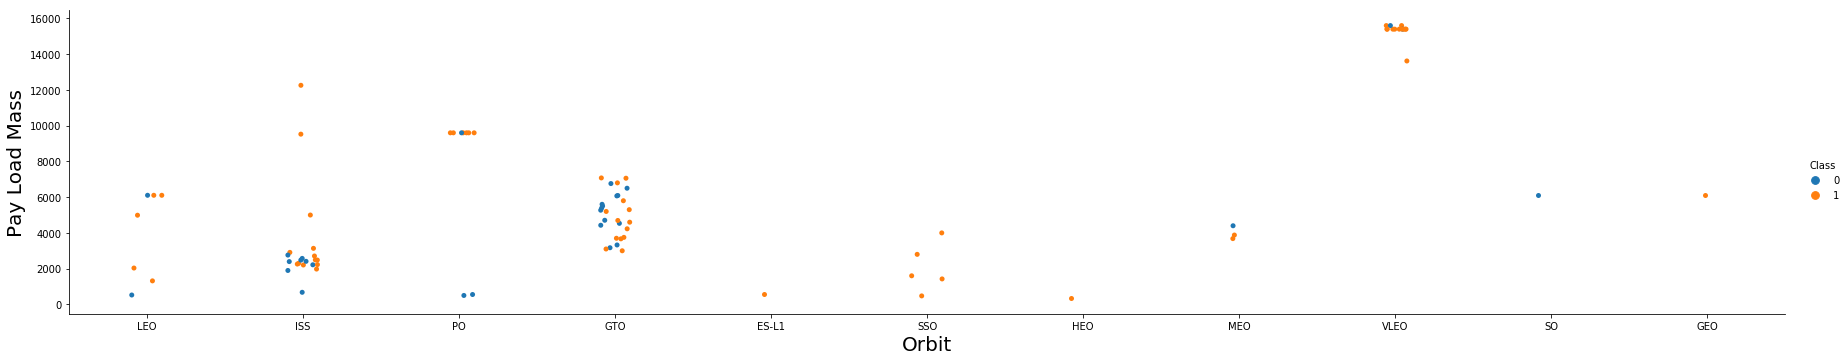

In [41]:
sns.catplot(y="PayloadMass",x="Orbit",hue='Class',data=df, aspect=5)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Pay Load Mass",fontsize=20)
plt.show()

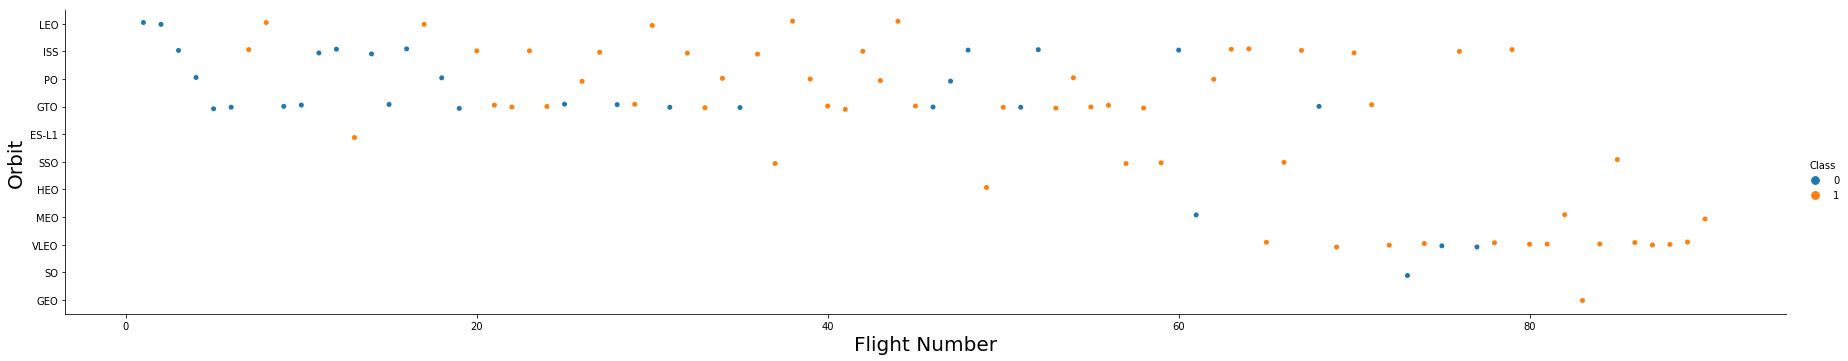

In [40]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

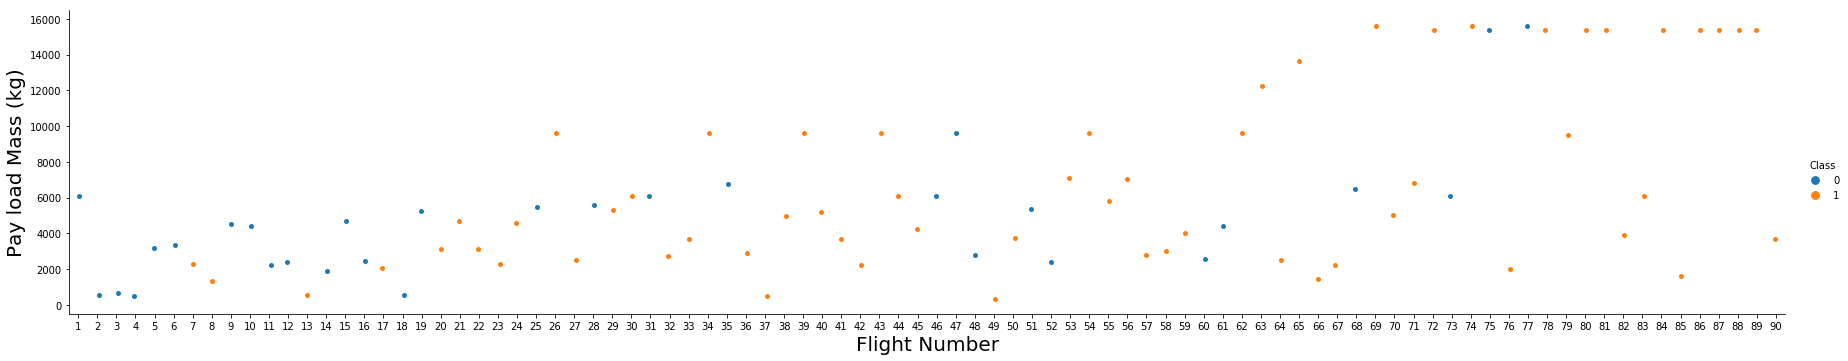

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

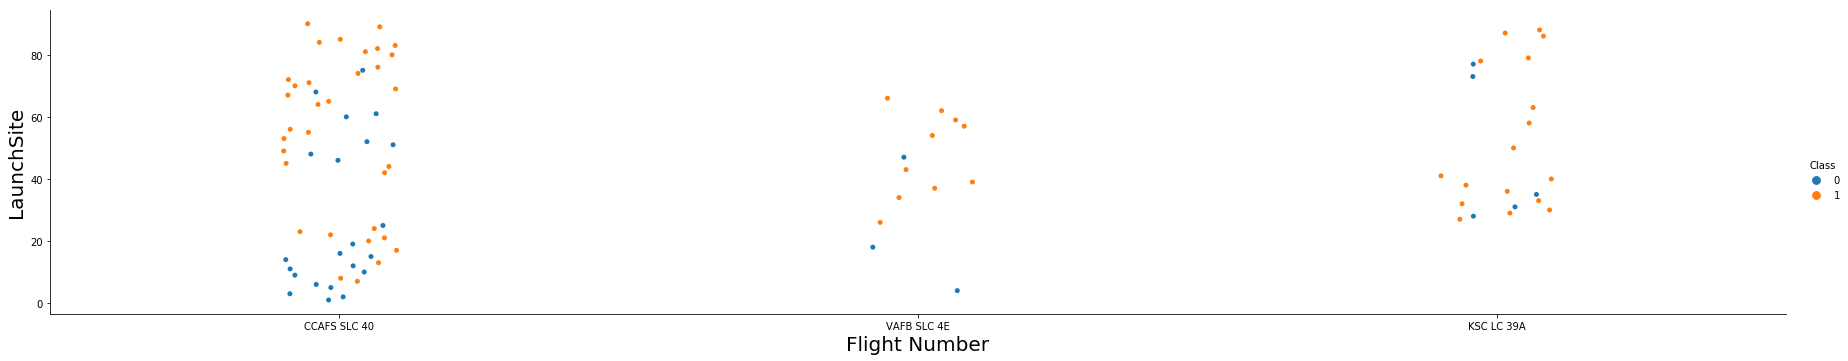

In [31]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="FlightNumber",x="LaunchSite",hue='Class',data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

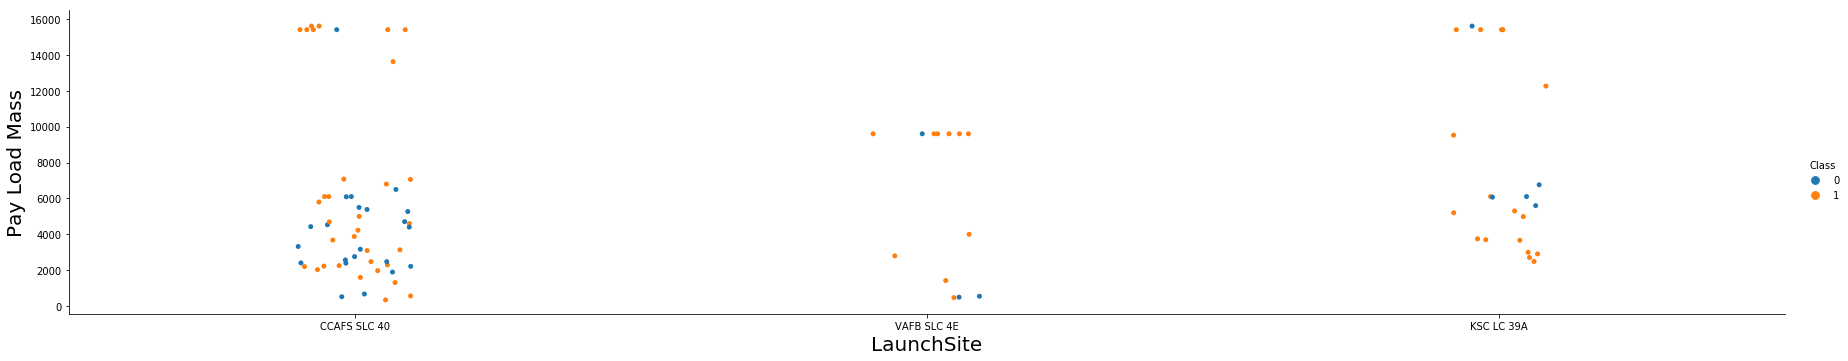

In [39]:
# Plot a scatter point chart with x axis to be LaunchSite and y axis to be the Payload, and hue to be the class value
sns.catplot(y="PayloadMass",x="LaunchSite",hue='Class',data=df, aspect=5)
plt.xlabel("LaunchSite",fontsize=20)
plt.ylabel("Pay Load Mass",fontsize=20)
plt.show()

In [37]:
df['LaunchSite']

0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4     CCAFS SLC 40
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

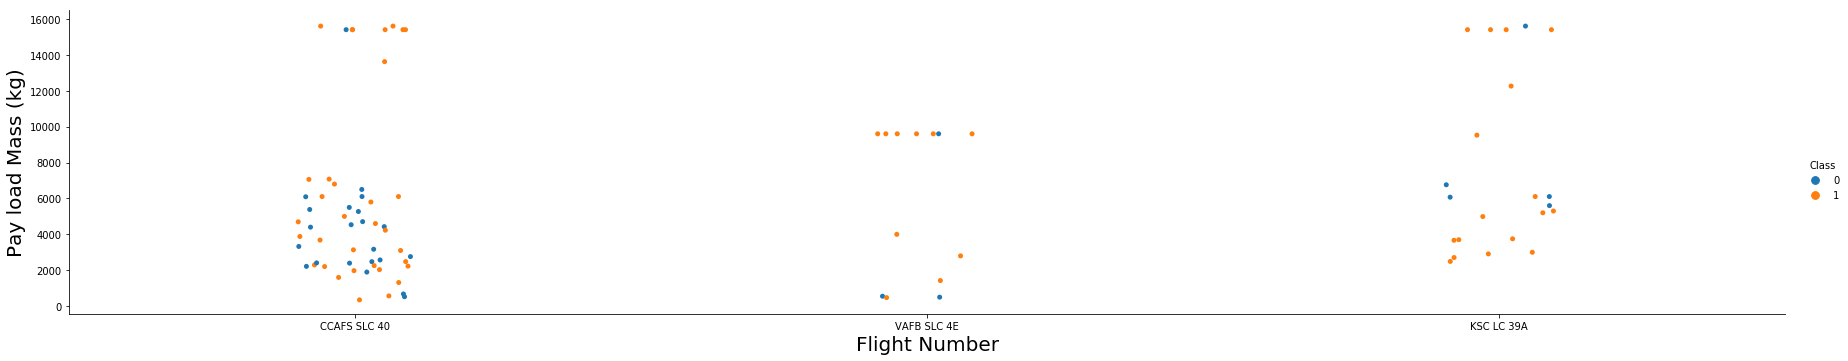

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

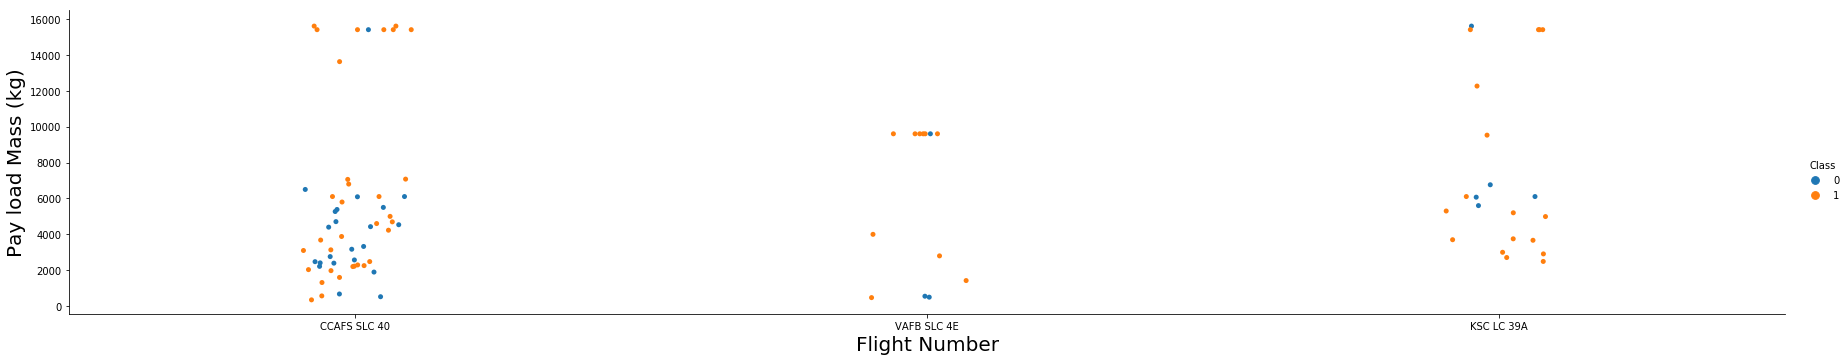

In [7]:
#TASK 2: Visualize the relationship between Payload and Launch Site
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [ ]:
#TASK 3: Visualize the relationship between success rate of each orbit type

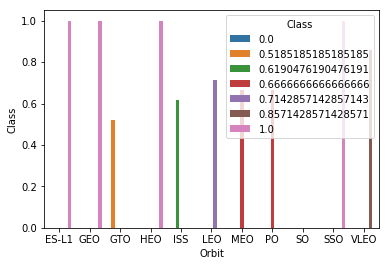

In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success = df.groupby('Orbit').mean()
orbit_success.reset_index(inplace=True)
sns.barplot(x="Orbit",y="Class",data=orbit_success,hue='Class')

In [ ]:
#TASK 4: Visualize the relationship between FlightNumber and Orbit type

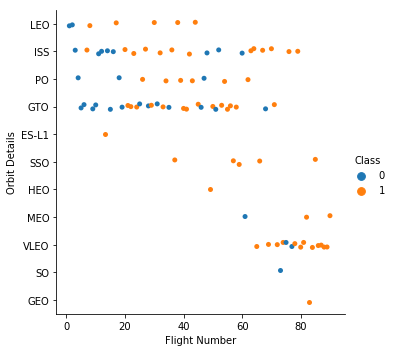

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Details')
plt.show()

In [ ]:
#TASK 5: Visualize the relationship between Payload and Orbit type

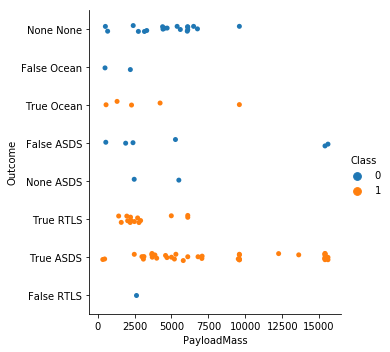

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x='PayloadMass',y='Outcome',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('Outcome')
plt.show()

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x='PayloadMass',y='Outcome',data=df,hue='Class')
plt.xlabel('PayloadMass')
plt.ylabel('Outcome')
plt.show()




In [42]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.catplot(x=average_by_year["Year"],y=average_by_year["Class"],data=df,hue='Class')
plt.xlabel("Year")
plt.ylabel("Success/Failure")
plt.show()

NameError: name 'average_by_year' is not defined

In [43]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
### TASK  6: Visualize the launch success yearly trend

In [22]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year(1)
df["Year"]=year
average_by_year = df.groupby(by="Year").mean()
average_by_year.reset_index(inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


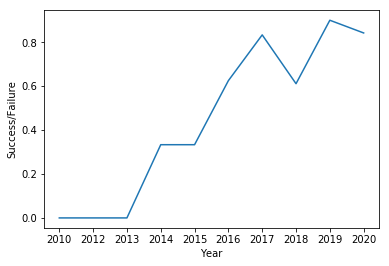

In [23]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.plot(average_by_year["Year"],average_by_year["Class"])
plt.xlabel("Year")
plt.ylabel("Success/Failure")
plt.show()

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
#TASK 7: Create dummy variables to categorical columns

In [15]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')

In [17]:
features_one_hot.to_csv('C:/Users/user/Desktop/aznazlytizcs files/analytics/Coursera-IBM-datascience/Python/dataset_part_3.csv', index=False)

In [ ]:
#Interactive visual analytics and dashboard

In [ ]:
#Launch Sites Locations Analysis with Folium

In [24]:
import folium
import pandas as pd

In [25]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin


In [26]:
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [12]:
pip install folium==0.7.0

     --------------------------------------- 85.5/85.5 kB 33.5 kB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.5.0
    Uninstalling folium-0.5.0:
      Successfully uninstalled folium-0.5.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [15]:
pip install folium==0.8.3

     -------------------------------------- 87.7/87.7 kB 355.1 kB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.7.0
    Uninstalling folium-0.7.0:
      Successfully uninstalled folium-0.7.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install wget


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=0c81ad7c0b5ab939004e3db61da355f7ecd624e56b0b91f112f738193994b37d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import folium
import pandas as pd
import wget

In [29]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium DivIcon plugin
from folium.features import DivIcon

In [30]:
from folium import plugins

In [31]:
# Import folium MousePosition plugin
from folium.plugins import MousePosition plugins.MousePosition

SyntaxError: invalid syntax (<ipython-input-31-270baa9d42f2>, line 2)

In [ ]:
#Task 1: Mark all launch sites on a map

In [32]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

100% [............................................................] 7710 / 7710

In [33]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


In [ ]:
#We first need to create a folium Map object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [88]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [89]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [90]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [28]:
# Initialize the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for index, row in launch_sites_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(row['Launch Site'])).add_to(site_map)
    folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row['Launch Site'], )).add_to(site_map)
site_map

In [ ]:
#Task 2: Mark the success/failed launches for each site on the map

In [29]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [30]:
marker_cluster = MarkerCluster()
#TODO: Create a new column in launch_sites dataframe called marker_color to store the marker colors based on the class value

In [31]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [ ]:
#TODO: For each launch result in spacex_df data frame, add a folium.Marker to marker_cluster

In [32]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, row in spacex_df.iterrows():
    # create and add a Marker cluster to the site map
    coordinate = [row['Lat'], row['Long']]
    folium.map.Marker(coordinate, icon=folium.Icon(color='white',icon_color=row['marker_color'])).add_to(marker_cluster)
site_map

In [ ]:
#TASK 3: Calculate the distances between a launch site to its proximities

In [91]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = plugins.MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [39]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [ ]:
#TODO: Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.

In [40]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
launch_site_lat = 28.563197
launch_site_lon = -80.576820
coastline_lat = 28.56334
coastline_lon = -80.56799
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(distance_coastline,' km')

0.8627671182499878  km


In [ ]:
#TODO: After obtained its coordinate, create a folium.Marker to show the distance

In [41]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )
distance_marker = folium.Marker(
   [coastline_lat, coastline_lon],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
       )
   )
site_map.add_child(distance_marker)

In [ ]:
#TODO: Draw a PolyLine between a launch site to the selected coastline point

In [42]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
coordinates = [[launch_site_lat,launch_site_lon],[coastline_lat,coastline_lon]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

In [ ]:
#TODO: Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use MousePosition to find the their coordinates on the map first

In [43]:
# Create a marker with distance to a closest city, railway, highway relative to CCAFS SLC-40
# Draw a line between the marker to the launch site
closest_highway = 28.56335, -80.57085
closest_railroad = 28.57206, -80.58525
closest_city = 28.10473, -80.64531

In [44]:
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, closest_highway[0], closest_highway[1])
print('distance_highway =',distance_highway, ' km')
distance_railroad = calculate_distance(launch_site_lat, launch_site_lon, closest_railroad[0], closest_railroad[1])
print('distance_railroad =',distance_railroad, ' km')
distance_city = calculate_distance(launch_site_lat, launch_site_lon, closest_city[0], closest_city[1])
print('distance_city =',distance_city, ' km')

distance_highway = 0.5834695366934144  km
distance_railroad = 1.2845344718142522  km
distance_city = 51.43416999517233  km


In [45]:
# closest highway marker
distance_marker = folium.Marker(
   closest_highway,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway),
       )
   )
site_map.add_child(distance_marker)
# closest highway line
coordinates = [[launch_site_lat,launch_site_lon],closest_highway]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest railroad marker
distance_marker = folium.Marker(
   closest_railroad,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railroad),
       )
   )
site_map.add_child(distance_marker)
# closest railroad line
coordinates = [[launch_site_lat,launch_site_lon],closest_railroad]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest city marker
distance_marker = folium.Marker(
   closest_city,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_city),
       )
   )
site_map.add_child(distance_marker)
# closest city line
coordinates = [[launch_site_lat,launch_site_lon],closest_city]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

In [ ]:
#My Findings
#As mentioned before, launch sites are in close proximity to equator to minimize fuel consumption by using Earth's ~ 30km/sec eastward spin to help spaceships get into orbit.
#Launch sites are in close proximity to coastline so they can fly over the ocean during launch, for at least two safety reasons-- (1) crew has option to abort launch and attempt water landing (2) minimize people and property at risk from falling debris.
#Launch sites are in close proximity to highways, which allows for easily transport required people and property.
#Launch sites are in close proximity to railways, which allows transport for heavy cargo.
#Launch sites are not in close proximity to cities, which minimizes danger to population dense areas.

In [ ]:
#Build a Dashboard Application with Plotly Dash



In [92]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
#Assignment: Machine Learning Prediction




In [46]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#This function is to plot the confusion matrix.

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/aznazlytizcs files/analytics/Coursera-IBM-datascience/Python/dataset_part_2.csv")

NameError: name 'pd' is not defined

In [49]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv("C:/Users/user/Desktop/aznazlytizcs files/analytics/Coursera-IBM-datascience/Python/dataset_part_3.csv")

In [52]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [28]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [7]:
Y = df['Class'].to_numpy()
Y.dtype

dtype('int64')

In [8]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X) 
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

In [10]:
print ('Train set:')
print('X-train= ', X_train.shape,'Y-train= ',Y_train.shape)
print ('Test set:')

Train set:
X-train=  (72, 83) Y-train=  (72,)
Test set:


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
# Create a logistic regression object
lr=LogisticRegression()

# Create a GridSearchCV object logreg_cv
logreg_cv = GridSearchCV(lr, parameters, cv=10)

#Fit the training data into the GridSearch object
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [14]:
print("Logistic Regression test data accuracy :",logreg_cv.score(X_test, Y_test))

Logistic Regression test data accuracy : 0.8333333333333334


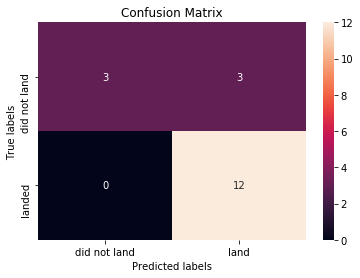

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create a support vector machine
svm = SVC()
# create a GridSearchCV object svm_cv with cv = 10
svm_cv = GridSearchCV(svm, parameters, cv= 10)

#Fit the training data into the GridSearch object
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [17]:
print("SVM test data accuracy :",svm_cv.score(X_test, Y_test))

SVM test data accuracy : 0.8333333333333334


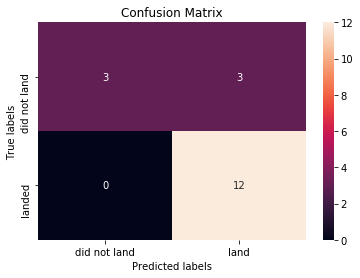

In [18]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [19]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

In [20]:
# create a GridSearchCV object tree_cv with cv = 10
tree_cv = GridSearchCV(tree, parameters, cv= 10)

#Fit the training data into the GridSearch object
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [21]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857145


In [22]:
print("Decision Tree accuracy on test set :",tree_cv.score(X_test, Y_test))

Decision Tree accuracy on test set : 0.8333333333333334


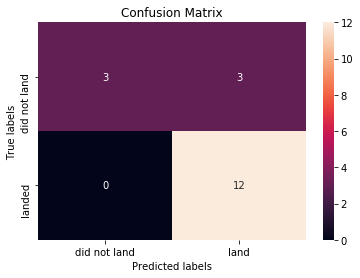

In [23]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Create a KNN classifier object
KNN = KNeighborsClassifier()
# create a GridSearchCV object knn_cv with cv = 10
knn_cv = GridSearchCV(KNN, parameters, cv= 10)

#Fit the training data into the GridSearch object
knn_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [25]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

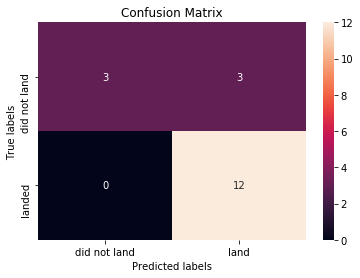

In [26]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.show()

In [27]:
Report = pd.DataFrame({'Method' : ['Test Data Accuracy']})

knn_accuracy=knn_cv.score(X_test, Y_test)
Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
SVM_accuracy=svm_cv.score(X_test, Y_test)
Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [Logistic_Regression]
Report['SVM'] = [SVM_accuracy]
Report['Decision Tree'] = [Decision_tree_accuracy]
Report['KNN'] = [knn_accuracy]




Report.transpose()

,0
Method,Test Data Accuracy
Logistic_Reg,0.833333
SVM,0.833333
Decision Tree,0.833333
KNN,0.833333


In [45]:
df['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [48]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [77]:
df['Outcome'].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

In [34]:
df['PayloadMass'].sum()

549446.3470588236

In [55]:
df['PayloadMass'].mean()

6104.959411764707

In [57]:
df['Outcome'].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

In [58]:
df['LandingPad'].unique()

array([nan, '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

In [67]:
new=df[df['Outcome']==('True RTLS','True ASDS')

SyntaxError: unexpected EOF while parsing (<ipython-input-67-cf57221642e2>, line 1)

In [64]:
new['Date']

16    2015-12-22
22    2016-07-18
26    2017-02-19
29    2017-05-01
31    2017-06-03
35    2017-08-14
37    2017-09-07
41    2017-12-15
43    2018-01-08
56    2018-10-08
65    2019-06-12
66    2019-07-25
75    2020-03-07
84    2020-08-30
Name: Date, dtype: object

In [78]:
df[(df['PayloadMass']>4000) & (df['PayloadMass']<6000) & (df['Outcome']=='True Ocean')]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
44,45,2018-01-31,Falcon 9,4230.0,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,NaN,3.0,1,B1032,-80.577366,28.561857,1


In [43]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [44]:
df['Outcome'].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

In [45]:
df['Outcome'].describe()

count            90
unique            8
top       True ASDS
freq             41
Name: Outcome, dtype: object

In [47]:
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [52]:
df[df['PayloadMass']==df['PayloadMass'].max()]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
68,69,2019-11-11,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.577366,28.561857,1
73,74,2020-01-29,Falcon 9,15600.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.577366,28.561857,1
76,77,2020-03-18,Falcon 9,15600.0,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0


In [59]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
include = df[df['Date'].dt.year == 2015]


In [61]:
include.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
11,12,2015-01-10,Falcon 9,2395.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857,0
12,13,2015-02-11,Falcon 9,570.0,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1
13,14,2015-04-14,Falcon 9,1898.0,ISS,CCAFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857,0
14,15,2015-04-27,Falcon 9,4707.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1016,-80.577366,28.561857,0
15,16,2015-06-28,Falcon 9,2477.0,ISS,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,0


In [64]:
start_date='2010-06-04'
end_date='2017-03-20'

In [65]:
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)


In [77]:
#& (df['Outcome']=='True%')]
y=df.loc[mask]
y['Outcome'].value_counts()

None None      8
True ASDS      5
False ASDS     4
True Ocean     3
True RTLS      3
None ASDS      2
False Ocean    2
Name: Outcome, dtype: int64

In [101]:
df[df['Outcome']=='True Ocean']

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
12,13,2015-02-11,Falcon 9,570.0,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1
42,43,2017-12-23,Falcon 9,9600.0,PO,VAFB SLC 4E,True Ocean,2,True,True,False,NaN,3.0,1,B1036,-120.610829,34.632093,1
44,45,2018-01-31,Falcon 9,4230.0,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,NaN,3.0,1,B1032,-80.577366,28.561857,1


In [35]:
df3=df.loc[(df['Outcome']=='True Ocean')|(df['Outcome']=='True ASDS')]
df3

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014
12,13,2015-02-11,Falcon 9,570.000000,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1,2015
19,20,2016-04-08,Falcon 9,3136.000000,ISS,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857,1,2016
20,21,2016-05-06,Falcon 9,4696.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1022,-80.577366,28.561857,1,2016
21,22,2016-05-27,Falcon 9,3100.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1023,-80.577366,28.561857,1,2016
23,24,2016-08-14,Falcon 9,4600.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1026,-80.577366,28.561857,1,2016
25,26,2017-01-14,Falcon 9,9600.000000,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1029,-120.610829,34.632093,1,2017
28,29,2017-03-30,Falcon 9,5300.000000,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.603956,28.608058,1,2017
32,33,2017-06-23,Falcon 9,3669.000000,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,3.0,1,B1029,-80.603956,28.608058,1,2017


In [43]:
#df['Outcome'].plot(kind='pie')
import matplotlib.pyplot as plt
%matplotlib inline
site=df['LaunchSite']


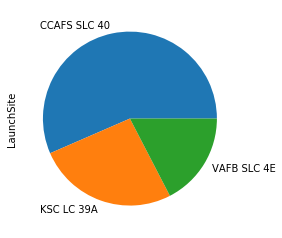

In [36]:
df3['LaunchSite'].value_counts().plot(kind='pie')

In [37]:
df3.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014
12,13,2015-02-11,Falcon 9,570.0,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1,2015
19,20,2016-04-08,Falcon 9,3136.0,ISS,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857,1,2016
20,21,2016-05-06,Falcon 9,4696.0,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1022,-80.577366,28.561857,1,2016


In [39]:
#Show the screenshot of the piechart for the launch site with highest launch success ratio

df3['LaunchSite'].value_counts()


CCAFS SLC 40    26
KSC LC 39A      12
VAFB SLC 4E      8
Name: LaunchSite, dtype: int64

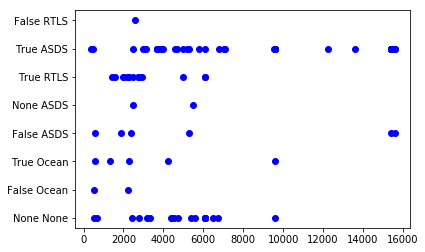

In [45]:
x=df['PayloadMass']
y=df['Outcome']
plt.scatter(x, y, c ="blue")


In [ ]:
payload vs launch outcome

In [49]:
import plotly.express as px




In [52]:
fig = px.scatter(df, x="PayloadMass", y="Outcome")
fig.show()

In [62]:
Report = df.DataFrame({'Method' : ['Test Data Accuracy']})

knn_accuracy=knn_cv.score(X_test, Y_test)
Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
SVM_accuracy=svm_cv.score(X_test, Y_test)
Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [Logistic_Regression]
Report['SVM'] = [SVM_accuracy]
Report['Decision Tree'] = [Decision_tree_accuracy]
Report['KNN'] = [knn_accuracy]




Report.transpose()

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [54]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [55]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [58]:
df['Outcome'].value_counts()


True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [60]:
y=df[(df['Outcome']=='True ADSD') | (df['Outcome']=='True RTLS') | (df['Outcome']=='True Ocean')]

In [61]:
y1=df['Outcome']

y.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1,2014
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1,2014
12,13,2015-02-11,Falcon 9,570.0,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1,2015
16,17,2015-12-22,Falcon 9,2034.0,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857,1,2015
22,23,2016-07-18,Falcon 9,2257.0,ISS,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,2.0,1,B1025,-80.577366,28.561857,1,2016


In [64]:
feature_df = df[['Orbit', 'LaunchSite', 'GridFins', 'Legs']]
X = np.asarray(feature_df)
X[0:5]



array([['LEO', 'CCAFS SLC 40', False, False],
       ['LEO', 'CCAFS SLC 40', False, False],
       ['ISS', 'CCAFS SLC 40', False, False],
       ['PO', 'VAFB SLC 4E', False, False],
       ['GTO', 'CCAFS SLC 40', False, False]], dtype=object)

In [102]:
cell_df = df['results']
y=cell_df

In [103]:
#y = np.asarray(cell_df['Outcome'])
y [0:5]

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: results, dtype: float64

In [105]:
#Train/Test dataset


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


In [79]:
feature_df.dtypes

Orbit         object
LaunchSite    object
GridFins        bool
Legs            bool
dtype: object

In [ ]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

ValueError: could not convert string to float: 'PO'

In [76]:
#confusion matrix



from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

NameError: name 'yhat' is not defined

In [75]:
Report = df.DataFrame({'Method' : ['Test Data Accuracy']})

knn_accuracy=knn_cv.score(X_test, Y_test)
Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
SVM_accuracy=svm_cv.score(X_test, Y_test)
Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [Logistic_Regression]
Report['SVM'] = [SVM_accuracy]
Report['Decision Tree'] = [Decision_tree_accuracy]
Report['KNN'] = [knn_accuracy]

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [84]:
pip install --upgrade category_encoders

     -------------------------------------- 81.9/81.9 kB 419.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import category_encoders as ce


In [86]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [107]:
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [5]:
dataset=pd.DataFrame(df['Outcome'])

NameError: name 'pd' is not defined

In [4]:
encoder= ce.OrdinalEncoder(cols=['Outcome'],return_df=True,mapping=[{'col':'Outcome','mapping':{'None None':0,'True ASDS':1,'True RTLS':1,'True Ocean':1}}])


dataset['encoded'] = encoder.fit_transform(dataset)

NameError: name 'dataset' is not defined

In [100]:
dataset.head(20)



,Outcome,encoded
0,None None,-1.0
1,None None,-1.0
2,None None,-1.0
3,False Ocean,-1.0
4,None None,-1.0
5,None None,-1.0
6,True Ocean,1.0
7,True Ocean,1.0
8,None None,-1.0
9,None None,-1.0


In [97]:
df['results']=dataset['encoded']

In [99]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year,results
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,-1.0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,-1.0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,-1.0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,-1.0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,-1.0


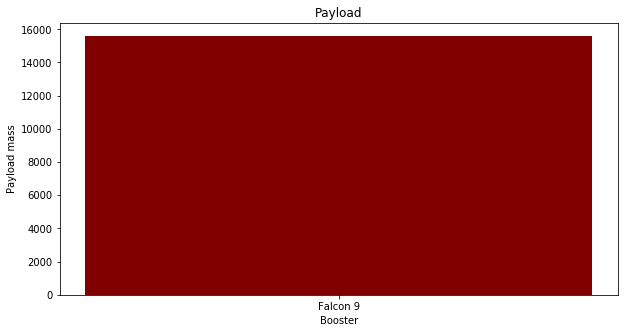

In [106]:
# creating the bar plot
boost = df['BoosterVersion']
pay = df['PayloadMass']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(boost, pay, color ='maroon',
        width = 0.4)
 
plt.xlabel("Booster")
plt.ylabel("Payload mass")
plt.title("Payload")
plt.show()

In [ ]:
#confusion matrix



from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

NameError: name 'X_train' is not defined